
**<font size=3>导入平台数据集</font>**

**数据集插件 -> 添加数据集 -> 数据集列表 -> 插入代码**

导入平台数据集并调试好代码后，点击代码编辑区的【运行全量】按钮，查看在全量数据的运行结果，全量数据运行结果的调用方式可参考：[《用户手册-全量运行代码调用》](/#/user-manual/experiment/experiment-debug)

全量运行之后，获取全量运行结果的主要流程：
**上传模型文件 -> 申报审核文件 -> 审核通过 ->下载文件**

上传模型文件接口示例：

```python
import wfio
wfio.upload_to_oss(server_path,local_path) 
#server_path是上传到服务器的文件名称，可以自定义
#local_path是本地上传的文件路径, 必须是本地已经存在的文件路径。
```


In [64]:
#导入数据集image-train-sample
#测试数据集将下载到当前目录下的"./testdata"文件夹下，如需改变目录名称请自行修改
import wfio
_INPUT = '{"type":25,"uri":"awss33ead09ff7f3b4555808852ce782a8afc:/"}'
dir_name = './testdata'
marker = "" # 下一次分页查询的开始标识
while True:
   ret = wfio.listdir(_INPUT, marker=marker)  
   print("Downloading {0} files...".format(len(ret["file_list"])))
   wfio.download(
       _INPUT,
       local_path="traindata",                 # 文件下载保存的目录，为None则表示下载到当前目录
       selected_files=ret["file_list"], # 下载的文件名称列表，至少指定一个文件名称
       overwrite=False                  # 是否覆盖同名文件
   )
   if not ret["has_more"]:              # 判断是否有更多文件, has_more字段不能修改
       print("All files download completed")
       break
   marker = ret["next_marker"]          # 下一次分页查询的开始标识

All files download completed


In [11]:
import os
from PIL import Image
import pandas as pd
from matplotlib import pyplot as plt

In [12]:
def drawBar(dict):
    plt.figure(figsize=(20,6))
    plt.bar(range(len(dict.keys())), [value for value in dict.values()], align='center',yerr=0.000001, )

    plt.xticks(range(len(dict.keys())), [key for key in dict.keys()])

    #设置横坐标轴的标签说明
    plt.xlabel('w/h ratio')
    #设置纵坐标轴的标签说明
    plt.ylabel('Frequency')
    #设置标题
    plt.title('w/h ratio distribution')
    #绘图
    plt.show()

## 统计类别分布比例

In [16]:
root_path = "/home/nbuser/work_2347b8d076f44f16a78f622099a9b1e8/traindata/train/labels"

In [17]:
classes_dict = {
    "0": "其他垃圾/一次性快餐盒",
    "1": "其他垃圾/污损塑料",
    "2": "其他垃圾/烟蒂",
    "3": "其他垃圾/牙签",
    "4": "其他垃圾/破碎花盆及碟碗",
    "5": "其他垃圾/竹筷",
    "6": "厨余垃圾/剩饭剩菜",
    "7": "厨余垃圾/大骨头",
    "8": "厨余垃圾/水果果皮",
    "9": "厨余垃圾/水果果肉",
    "10": "厨余垃圾/茶叶渣",
    "11": "厨余垃圾/菜叶菜根",
    "12": "厨余垃圾/蛋壳",
    "13": "厨余垃圾/鱼骨",
    "14": "可回收物/充电宝",
    "15": "可回收物/包",
    "16": "可回收物/化妆品瓶",
    "17": "可回收物/塑料玩具",
    "18": "可回收物/塑料碗盆",
    "19": "可回收物/塑料衣架",
    "20": "可回收物/快递纸袋",
    "21": "可回收物/插头电线",
    "22": "可回收物/旧衣服",
    "23": "可回收物/易拉罐",
    "24": "可回收物/枕头",
    "25": "可回收物/毛绒玩具",
    "26": "可回收物/洗发水瓶",
    "27": "可回收物/玻璃杯",
    "28": "可回收物/皮鞋",
    "29": "可回收物/砧板",
    "30": "可回收物/纸板箱",
    "31": "可回收物/调料瓶",
    "32": "可回收物/酒瓶",
    "33": "可回收物/金属食品罐",
    "34": "可回收物/锅",
    "35": "可回收物/食用油桶",
    "36": "可回收物/饮料瓶",
    "37": "有害垃圾/干电池",
    "38": "有害垃圾/软膏",
    "39": "有害垃圾/过期药物"
}
label_num = {str(x):0 for x in range(40)}   #0.1间隔进行统计z  
for file in os.listdir(root_path):
    label_path = os.path.join(root_path, file)
    with open(label_path, "r") as f:
        label = f.read().split(",")[-1][1:]
        label_num[label] += 1


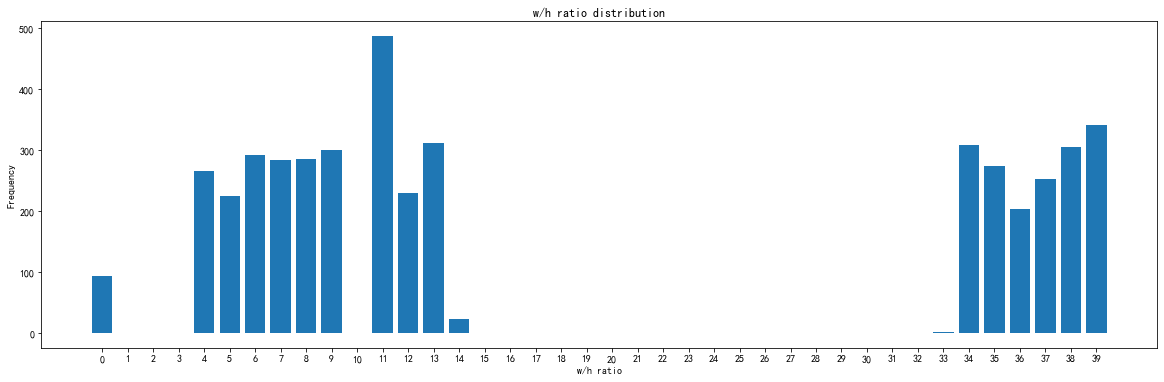

In [18]:
drawBar(label_num)

### 结论：
 `"17": "可回收物/塑料玩具"这一类数据最多，其他类别的数据较为均`<p>
{
    "0": "其他垃圾/一次性快餐盒",
    "1": "其他垃圾/污损塑料",
    "2": "其他垃圾/烟蒂",
    "3": "其他垃圾/牙签",
    "4": "其他垃圾/破碎花盆及碟碗",
    "5": "其他垃圾/竹筷",
    "6": "厨余垃圾/剩饭剩菜",
    "7": "厨余垃圾/大骨头",
    "8": "厨余垃圾/水果果皮",
    "9": "厨余垃圾/水果果肉",
    "10": "厨余垃圾/茶叶渣",
    "11": "厨余垃圾/菜叶菜根",
    "12": "厨余垃圾/蛋壳",
    "13": "厨余垃圾/鱼骨",
    "14": "可回收物/充电宝",
    "15": "可回收物/包",
    "16": "可回收物/化妆品瓶",
    "17": "可回收物/塑料玩具",
    "18": "可回收物/塑料碗盆",
    "19": "可回收物/塑料衣架",
    "20": "可回收物/快递纸袋",
    "21": "可回收物/插头电线",
    "22": "可回收物/旧衣服",
    "23": "可回收物/易拉罐",
    "24": "可回收物/枕头",
    "25": "可回收物/毛绒玩具",
    "26": "可回收物/洗发水瓶",
    "27": "可回收物/玻璃杯",
    "28": "可回收物/皮鞋",
    "29": "可回收物/砧板",
    "30": "可回收物/纸板箱",
    "31": "可回收物/调料瓶",
    "32": "可回收物/酒瓶",
    "33": "可回收物/金属食品罐",
    "34": "可回收物/锅",
    "35": "可回收物/食用油桶",
    "36": "可回收物/饮料瓶",
    "37": "有害垃圾/干电池",
    "38": "有害垃圾/软膏",
    "39": "有害垃圾/过期药物"
}



## 统计图片的长宽比例

In [7]:
#get h/w 比值
root_path = "/home/nbuser/work_2347b8d076f44f16a78f622099a9b1e8/testdata/test/images"
w_h = []
for root, dirs, files in os.walk(root_path):
    for file in files:
        img_path = os.path.join(root, file)
        image = Image.open(img_path)
        #image.show()
        width, height = image.size
        if height!= 0:
            w_h.append(width/height)
        else:
            print("the image:{} is null!").formate(image_path)

In [8]:
#分段统计
intervals = {'{}-{}'.format(round(0.1*x+0.6,1),round(0.1*x+0.7,1)):0 for x in range(14)}   #0.1间隔进行统计z  
for data in w_h:
    for interval in intervals:
        start, end = tuple(interval.split('-'))
        if data>float(start) and data<float(end):
            intervals[interval] +=1

intervals

{'0.6-0.7': 25,
 '0.7-0.8': 148,
 '0.8-0.9': 68,
 '0.9-1.0': 43,
 '1.0-1.1': 55,
 '1.1-1.2': 55,
 '1.2-1.3': 57,
 '1.3-1.4': 171,
 '1.4-1.5': 85,
 '1.5-1.6': 107,
 '1.6-1.7': 46,
 '1.7-1.8': 48,
 '1.8-1.9': 15,
 '1.9-2.0': 6}

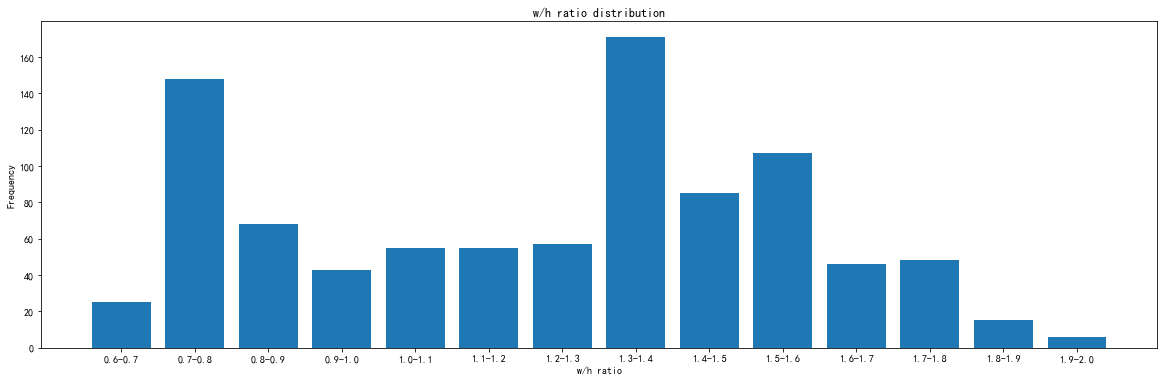

In [9]:
drawBar(intervals)

### 结论：width / height的比例集中在1附近，因此后期模型尺寸调整的长宽比例为1:1

In [10]:
#导入数据集garbage-test-firsttype-sample
#测试数据集将下载到当前目录下的"./testdata"文件夹下，如需改变目录名称请自行修改
import wfio
_INPUT = '{"type":25,"uri":"awss30bbafb292bd54a0199df613e8d289d42:/"}'
dir_name = './testdata'
marker = "" # 下一次分页查询的开始标识
while True:
   ret = wfio.listdir(_INPUT, marker=marker)  
   print("Downloading {0} files...".format(len(ret["file_list"])))
   wfio.download(
       _INPUT,
       local_path="first_type_train",                 # 文件下载保存的目录，为None则表示下载到当前目录
       selected_files=ret["file_list"], # 下载的文件名称列表，至少指定一个文件名称
       overwrite=False                  # 是否覆盖同名文件
   )
   if not ret["has_more"]:              # 判断是否有更多文件, has_more字段不能修改
       print("All files download completed")
       break
   marker = ret["next_marker"]          # 下一次分页查询的开始标识

All files download completed


In [20]:
root_path = "/home/nbuser/work_2347b8d076f44f16a78f622099a9b1e8/first_type_train/test"

In [28]:
classes_dict = {
    "0": "其他垃圾/一次性快餐盒",
    "1": "其他垃圾/污损塑料",
    "2": "其他垃圾/烟蒂",
    "3": "其他垃圾/牙签",
    "4": "其他垃圾/破碎花盆及碟碗",
    "5": "其他垃圾/竹筷",
    "6": "厨余垃圾/剩饭剩菜",
    "7": "厨余垃圾/大骨头",
    "8": "厨余垃圾/水果果皮",
    "9": "厨余垃圾/水果果肉",
    "10": "厨余垃圾/茶叶渣",
    "11": "厨余垃圾/菜叶菜根",
    "12": "厨余垃圾/蛋壳",
    "13": "厨余垃圾/鱼骨",
    "14": "可回收物/充电宝",
    "15": "可回收物/包",
    "16": "可回收物/化妆品瓶",
    "17": "可回收物/塑料玩具",
    "18": "可回收物/塑料碗盆",
    "19": "可回收物/塑料衣架",
    "20": "可回收物/快递纸袋",
    "21": "可回收物/插头电线",
    "22": "可回收物/旧衣服",
    "23": "可回收物/易拉罐",
    "24": "可回收物/枕头",
    "25": "可回收物/毛绒玩具",
    "26": "可回收物/洗发水瓶",
    "27": "可回收物/玻璃杯",
    "28": "可回收物/皮鞋",
    "29": "可回收物/砧板",
    "30": "可回收物/纸板箱",
    "31": "可回收物/调料瓶",
    "32": "可回收物/酒瓶",
    "33": "可回收物/金属食品罐",
    "34": "可回收物/锅",
    "35": "可回收物/食用油桶",
    "36": "可回收物/饮料瓶",
    "37": "有害垃圾/干电池",
    "38": "有害垃圾/软膏",
    "39": "有害垃圾/过期药物"
}
label_num = {str(x):0 for x in range(40)}   #0.1间隔进行统计z  
for file in os.listdir(root_path):
    label_num[file]  = len(os.listdir(os.path.join(root_path, file)))

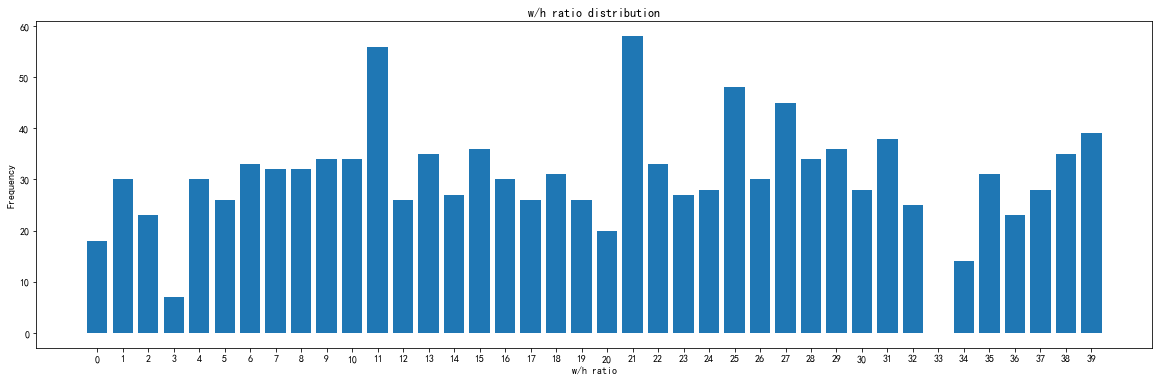

In [30]:
drawBar(label_num)